<a href="https://colab.research.google.com/github/charlottetse33/portfolio/blob/main/Data_mining_review.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data mining of reviews data for businesses in the US

### Part 1: Explore features of dataset 

In [27]:
#import pandas
import pandas as pd
import numpy as np
#read csv
data = pd.read_csv('https://raw.githubusercontent.com/charlottetse33/portfolio/main/US%20business%20reviews/review.csv')

In [28]:
#1.1 Shape of the dataset
data.shape

(10000, 10)

In [29]:
#1.1 descriptive statistics of all numeric columns
data.describe()

,stars,cool,useful,funny
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,3.777500,0.876800,1.409300,0.701300
std,1.214636,2.067861,2.336647,1.907942
min,1.000000,0.000000,0.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000
50%,4.000000,0.000000,1.000000,0.000000
75%,5.000000,1.000000,2.000000,1.000000
max,5.000000,77.000000,76.000000,57.000000


In [30]:
#1.1 check if there are any missing values in the dataset
data.isnull().sum()

business_id    0
date           0
review_id      0
stars          0
text           0
type           0
user_id        0
cool           0
useful         0
funny          0
dtype: int64

In [31]:
#1.2 distribution of star ratings
df = pd.DataFrame(data.stars.value_counts().sort_index()).reset_index()
df.columns = ['Stars', 'Quantity']
df

,Stars,Quantity
0,1,749
1,2,927
2,3,1461
3,4,3526
4,5,3337


In [32]:
#1.3 How many businesses were reviewed
data['business_id'].nunique()

4174

In [33]:
#1.4 top 10 businesses with best average ratings 
data.groupby('business_id').stars.mean().sort_values(ascending=False).head(10)

business_id
zyYRWnimLbQt9aCCI_2MZw    5.0
o2rrTbAxGXrdQKQvKDcGiA    5.0
oHjoahzL5F0m-OGDQouEGw    5.0
PgcuQvFl76bx42xIFyhzVg    5.0
oGYPsU7IJPhyVpd0F5lfTg    5.0
PqJwKYHU_eHjw0q0NlULJw    5.0
PrYz1XEnvGJ-5Q0VVPCLnQ    5.0
oBVS96DtPGk9GU8zPx5Hjg    5.0
PwtYeGu-19v9bU4nbP9UbA    5.0
Q-dsvMlhEr9TgvX8FxW4uQ    5.0
Name: stars, dtype: float64

In [34]:
#1.5 top 10 businesses with best average ratings, but only those businesses with more than 10 reviews
after=data          #'after' is just another similar dataframe for easier manipulation without affecting the original data
after['number']=after.groupby('business_id')['business_id'].transform(len)
after[after.number>10].groupby('business_id').stars.mean().sort_values(ascending=False).head(10)

business_id
KBG28p3lGX17hOPoHhq5PQ    4.818182
z3yFuLVrmH-3RJruPEMYKw    4.769231
Bc4DoKgrKCtCuN-0O5He3A    4.750000
6oRAC4uyJCsJl1X0WZpVSA    4.583333
7SO_rX1F6rQEl-5s3wZxgQ    4.571429
zp713qNhx8d9KCJJnrw1xA    4.545455
I4bSn5gXsHuSPu7L-d_8nQ    4.545455
IuAPYzf3NSyfyXYgT46YVA    4.545455
hfl62LX14YqNpG0g0Tj6_Q    4.533333
L9UYbtAUOcfTgZFimehlXw    4.526316
Name: stars, dtype: float64

In [35]:
#1.6 list top 10 reviewers whose reviews got the most total number of useful ratings
data.groupby('user_id').useful.sum().sort_values(ascending=False).head(10)

user_id
fczQCSmaWF78toLEmb0Zsw    293
C8ZTiwa7qWoPSMIivTeSfw    143
P2kVk4cIWyK4e4h14RhK-Q    132
4ozupHULqGyO42s3zNUzOQ    130
0bNXP9quoJEgyVZu9ipGgQ    115
sEWeeq41k4ohBz4jS_iGRw    103
wHg1YkCzdZq9WBJOTRgxHQ    100
kGgAARL2UmvCcTRfiscjug     82
73eZuIuXVD5sif7GrIMfuQ     76
C6IOtaaYdLIT5fWd7ZYIuA     74
Name: useful, dtype: int64

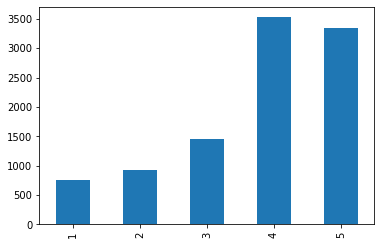

In [36]:
#1.7 Plot a bar chart for star ratings
data.stars.value_counts().sort_index().plot(kind= 'bar')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


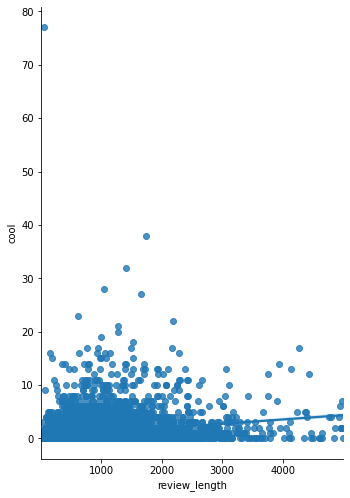

In [37]:
#1.8 Plot and see the relationship between review text's lengths and cool/useful/funny
import matplotlib.pyplot as plt
import seaborn as sns
after['review_length']=after.text.str.len()
sns.pairplot(after, x_vars=['review_length'], y_vars=['cool'], size=7, aspect=0.7, kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


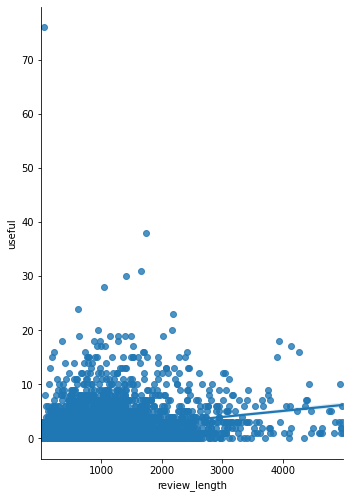

In [38]:
sns.pairplot(after, x_vars=['review_length'], y_vars=['useful'], size=7, aspect=0.7, kind='reg')

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:1969: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


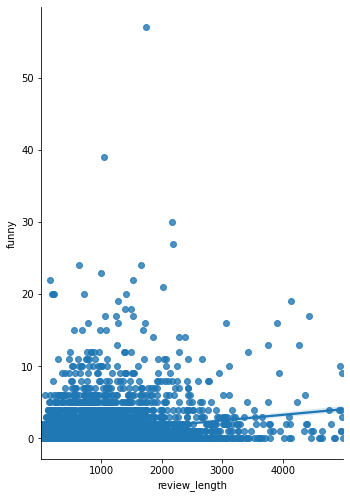

In [39]:
sns.pairplot(after, x_vars=['review_length'], y_vars=['funny'], size=7, aspect=0.7, kind='reg')

In [40]:
#1.9 Find the mean number of stars in reviews for different months at any year
after['date'] = pd.to_datetime(after['date'])
after.groupby(after['date'].dt.strftime('%B'))['stars'].mean().sort_values(ascending=False)

date
January      3.823402
September    3.820153
March        3.819890
February     3.795670
July         3.787879
December     3.786946
June         3.760256
October      3.755528
August       3.748652
April        3.743163
May          3.742925
November     3.739130
Name: stars, dtype: float64

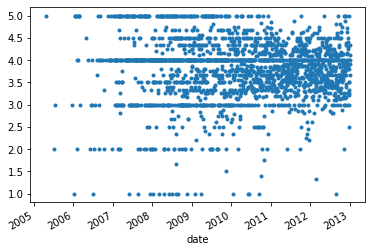

In [41]:
# 1.9 Plot showing relationship between date (year 2005~2013) and stars 
#The graph shows that a higher proportion of reviews in year 2012/2013 are of more stars compared to the previous years
after.sort_values('date',inplace=True)
after.groupby('date').stars.mean().plot(style='.')

### Part 2: Predict star ratings from review text (Naive Bayes Model vs Logistic regression)

In [42]:
#Read the csv file again
data = pd.read_csv('https://raw.githubusercontent.com/charlottetse33/portfolio/main/US%20business%20reviews/review.csv')
after=data

In [43]:
#2.1 Train/test split data, and then predict. Report prediction accuracy and confusion matrix
from sklearn.feature_extraction.text import CountVectorizer

#train/test split
X=after.text
y=after.stars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
vect_review = CountVectorizer()
vect_review.fit(X_train)

# 'document-term matrix'
X_train_dtm = vect_review.transform(X_train)
X_train_dtm = vect_review.fit_transform(X_train)
X_test_dtm = vect_review.transform(X_test)

Multinomial Naive Bayes model

In [44]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

#prediction accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.4712

The accuracy rate is too low.

In [45]:
#confusion matrix
metrics.confusion_matrix(y_test, y_pred_class)

array([[ 55,  14,  24,  65,  27],
       [ 28,  16,  41, 122,  27],
       [  5,   7,  35, 281,  37],
       [  7,   0,  16, 629, 232],
       [  6,   4,   6, 373, 443]])

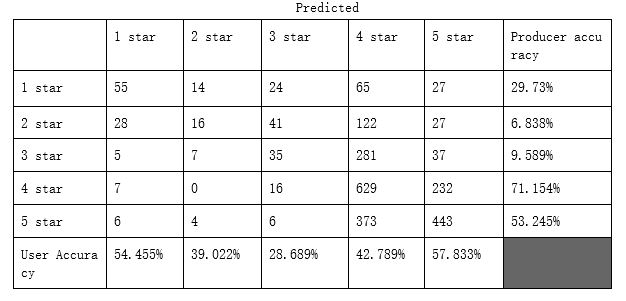

The accuracy between different stars are relatively spread out compare to the Naive Bayes Classifier. While, 1 star and 5 stars have the highest accuracy among the others.

Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_logreg = logreg.predict(X_test_dtm)
metrics.accuracy_score(y_test, y_pred_logreg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.4992

In [47]:
#2.2 Repeat step 1, but only with reviews that give start ratings 1 or 5
review1_5=after[(after.stars==1) | (after.stars==5)]

X=review1_5.text
y=review1_5.stars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
vect_review1_5 = CountVectorizer()
vect_review1_5.fit(X_train)

# 'document-term matrix'
X_train_dtm = vect_review1_5.transform(X_train)
X_train_dtm = vect_review1_5.fit_transform(X_train)
X_test_dtm = vect_review1_5.transform(X_test)

#Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

#prediction accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.9187866927592955

In [48]:
metrics.confusion_matrix(y_test, y_pred_class)

array([[126,  58],
       [ 25, 813]])

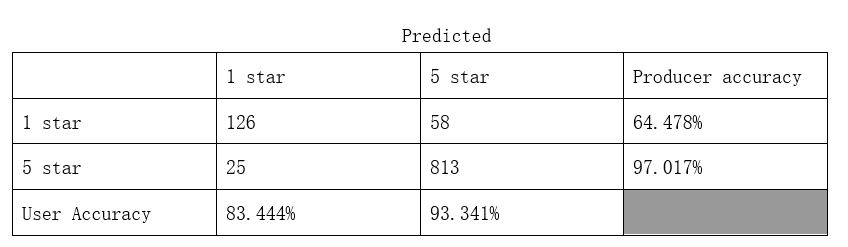

The prediction for accuracy on 1 stars is lower than 5 stars.

In [49]:
#2.2 False Positive reviews
X_test[(y_test == 1) & (y_pred_class==5)]

2175    This has to be the worst restaurant in terms o...
1781    If you like the stuck up Scottsdale vibe this ...
2674    I'm sorry to be what seems to be the lone one ...
9984    Went last night to Whore Foods to get basics t...
3392    I found Lisa G's while driving through phoenix...
8283    Don't know where I should start. Grand opening...
2765    Went last week, and ordered a dozen variety. I...
2839    Never Again,\nI brought my Mountain Bike in (w...
321     My wife and I live around the corner, hadn't e...
1919                                         D-scust-ing.
2490    Lazy Q CLOSED in 2010.  New Owners cleaned up ...
9125    La Grande Orange Grocery has a problem. It can...
9185    For frozen yogurt quality, I give this place a...
436     this another place that i would give no stars ...
2051    Sadly with new owners comes changes on menu.  ...
1721    This is the closest to a New York hipster styl...
3447    If you want a school that cares more about you...
842     Boy is

In [50]:
#2.2 False Negative message
X_test[(y_test == 5) & (y_pred_class==1)]

7148    I now consider myself an Arizonian. If you dri...
4963    This is by far my favourite department store, ...
6318    Since I have ranted recently on poor customer ...
380     This is a must try for any Mani Pedi fan. I us...
5565    I`ve had work done by this shop a few times th...
3448    I was there last week with my sisters and whil...
6050    I went to sears today to check on a layaway th...
2504    I've passed by prestige nails in walmart 100s ...
2475    This place is so great! I am a nanny and had t...
241     I was sad to come back to lai lai's and they n...
3149    I was told to see Greg after a local shop diag...
423     These guys helped me out with my rear windshie...
763     Here's the deal. I said I was done with OT, bu...
8956    I took my computer to RedSeven recently when m...
750     This store has the most pleasant employees of ...
9765    You can't give anything less than 5 stars to a...
6334    I came here today for a manicure and pedicure....
1282    Loved 

For False positive reviews, we were able to identify common wordings in the reviews, such as ‘good’,’nice’,’impressive’ in it, generally positive, however these words are used in a sarcastic manner or are combined with other wordings that might result in a negative meaning . The machine learning correlates wordings with 5 star ratings training data set, resulting in these False positive reviews.

For False negative reviews, there are negative words, such as ‘sad’ in it. The machine learning correlates negative wordings with 1 star ratings, resulting in these false negative reviews. 

The percentage of False positive reviews (93.341%) is lower than the percentage of False negative reviews(83.44%). 


In [51]:
#2.3 top 10 token words in the training data that are most predictive of 5-star reviews
X_train_tokens = vect_review1_5.get_feature_names()
tokens = pd.DataFrame({'one':nb.feature_count_[0, :], 'five':nb.feature_count_[1, :]}, index=X_train_tokens)
tokens['one'] = tokens['one'] + 1
tokens['five'] = tokens['five'] + 1
tokens['one'] = tokens.one/nb.class_count_[0]
tokens['five'] = tokens.five/nb.class_count_[1]
tokens['rating_5_ratio'] = tokens.five/tokens.one
tokens.sort_values('rating_5_ratio', ascending=False).head(10)

,one,five,rating_5_ratio
fantastic,0.003540,0.077231,21.817727
perfect,0.005310,0.098039,18.464052
yum,0.001770,0.024810,14.017607
favorite,0.012389,0.138055,11.143029
outstanding,0.001770,0.019608,11.078431
brunch,0.001770,0.016807,9.495798
gem,0.001770,0.016006,9.043617
mozzarella,0.001770,0.015606,8.817527
pasty,0.001770,0.015606,8.817527
amazing,0.021239,0.185274,8.723323


The top ten token words in the training data for 5 star reviews are mostly positive adjectives, yet, some are totally unrelated or neutral words that does not necessary correlates to the star ratings, such as ‘brunch’ and ‘gem’. 

In [52]:
#2.3 top 10 token words that are most predictive for 1-star reviews
tokens.drop('rating_5_ratio',axis=1,inplace=True)
tokens['rating_1_ratio'] = tokens.one/tokens.five
tokens.sort_values('rating_1_ratio', ascending=False).head(10)

,one,five,rating_1_ratio
staffperson,0.030088,0.0004,75.191150
refused,0.024779,0.0004,61.922124
disgusting,0.042478,0.0008,53.076106
filthy,0.019469,0.0004,48.653097
unacceptable,0.015929,0.0004,39.807080
acknowledge,0.015929,0.0004,39.807080
unprofessional,0.015929,0.0004,39.807080
ugh,0.030088,0.0008,37.595575
yuck,0.028319,0.0008,35.384071
fuse,0.014159,0.0004,35.384071


While the top ten token words in the training data for 1 star reviews are mostly negative adjectives, such as ‘disgusting’, ‘filthy’ , however some are totally unrelated or neutral words that does not necessary correlates to the star ratings,such as ‘staff person’ bring the number 1 on the list, this might imply that a lot of the dissatisfaction of the restaurant in the data set are correlated to the staffs or service in the restaurants.

Logistics regression

In [53]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_logreg = logreg.predict(X_test_dtm)
metrics.accuracy_score(y_test, y_pred_logreg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.9256360078277887

Conclusion: Logistic Regression gives a higher accuracy rate than naive bayes in the sama dataset using the default test and train split rate

### Part 3: Filter unreliable reviews 

In [54]:
#3.1 better prediction accuracy by filtering out some unreliable reviews
new=data[(data.cool<10) & (data.useful < 10) & (data.funny<10)]
X=new.text
y=new.stars
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)
vect_new = CountVectorizer()
vect_new.fit(X_train)

# 'document-term matrix'
X_train_dtm = vect_new.transform(X_train)
X_train_dtm = vect_new.fit_transform(X_train)
X_test_dtm = vect_new.transform(X_test)

#Multinomial Naive Bayes model
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
nb.fit(X_train_dtm, y_train)
y_pred_class = nb.predict(X_test_dtm)

#prediction accuracy
from sklearn import metrics
metrics.accuracy_score(y_test, y_pred_class)

0.4804719283970708

In [55]:
len(new)

9830

3.1) After removing 170 reviews out of 10000 with abnormally high scores in 'cool','useful' and 'funny', the prediction accuracy improves to 0.48 (previous rate is 0.471).

In [56]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_dtm, y_train)
y_pred_logreg = logreg.predict(X_test_dtm)
metrics.accuracy_score(y_test, y_pred_logreg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.5069161920260374

The accuracy increased by 0.01 after filtering some unreliable reviews. However, the accuracy score is still very low. This might mean that we need to weight the analysis on 1 to 5 stars together into lower ranking ,or consider another an alternative for evaluating the reviews of the restaurants are taking the 2 cases (i.e 1 and 5 stars) to predict the stars from the text, it is proven to be more accurate which will be demonstrated in the following tasks.